         X1        X2  target
0 -5.347912  5.156349       2
1  0.144044  1.454274       0
2  0.978738  2.240893       0
3  1.867558 -0.977278       0
4  5.313068  4.145904       1
5  5.443863  5.333674       1
6  1.764052  0.400157       0
7  6.494079  4.794842       1
8 -5.887786  3.019204       2
9 -3.769709  6.202380       2


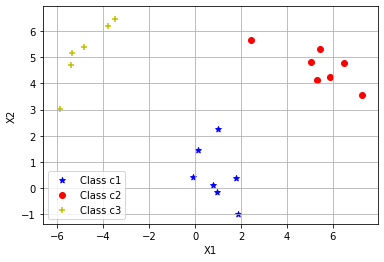

In [6]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd

# 3 classes c₁, c₂, c₃, and
# x consists of 2 features x₁, x₂,

# Create the data. The classes are c_1=0, c_2=1 and c_3=2.
X, y = make_blobs(n_samples=20, centers=[(0,0), (5,5), (-5, 5)], random_state=0)

df = pd.DataFrame(X,columns=["X1","X2"])

df['target'] = y

print(df.head(10))

import matplotlib.pyplot as plt
plt.scatter(df[df['target'] ==0]['X1'],df[df['target'] ==0]['X2'],c ='b',Label = 'Class c1',marker='*')
plt.scatter(df[df['target'] ==1]['X1'],df[df['target'] ==1]['X2'],c ='r',Label = 'Class c2',marker='o')
plt.scatter(df[df['target'] ==2]['X1'],df[df['target'] ==2]['X2'],c ='y',Label = 'Class c3',marker='+')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid()
plt.show()

In [17]:
# Step 1

# find The class probabilities.
prior = np.bincount(y) / len(y)

print(prior);print("\n")

# or

print("class 1:",len(df[df['target'] ==0]) / len(df['target']))
print("class 2:",len(df[df['target'] ==1]) / len(df['target']))
print("class 3:",len(df[df['target'] ==2]) / len(df['target']))


# Step 2:

# Find the 'mean' and 'Standard Deviation' with respect to class
means = np.array([X[np.where(y==i)].mean(axis=0) for i in range(3)])
stds = np.array([X[np.where(y==i)].std(axis=0) for i in range(3)])

print("means:{0} {1} Std:{2}".format(means,"\n\n",stds))

[0.35 0.35 0.3 ]


class 1: 0.35
class 2: 0.35
class 3: 0.3
means:[[ 0.90889988  0.49985176]
 [ 5.4111385   4.6491892 ]
 [-4.7841679   5.15385848]] 

 Std:[[0.6853714  0.9789976 ]
 [1.40218915 0.67078568]
 [0.88192625 1.12879666]]


In [ ]:
# Naive Bayes for Gaussian Theroem

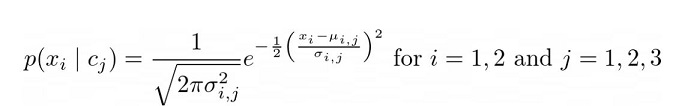

In [21]:
# Let’s assume a new data point x*=(-2, 5) comes in.
x_new = np.array([-2, 5])

# Use below the formula for finding naive bayes as input varibales(X1,X2) are continues
for j in range(3):    
    print(f'Probability for class {j}: \
    {(1/np.sqrt(2*np.pi*stds[j]**2)*np.exp(-0.5*((x_new-means[j])/stds[j])**2)).prod()*prior[j]:.12f}')

Probability for class 0:     0.000000000263
Probability for class 1:     0.000000044359
Probability for class 2:     0.000325643718


In [25]:
# Sum of above the Probability for class  = 0.00032569
# Lets dividing these three values by their sum of about 0.00032569

# P(C1 | X*)
np.divide(0.000000000263,0.00032569)
# = 0.0000008

8.075163499032823e-07


In [23]:
# P(C2 | X*)
np.divide(0.000000044359,0.00032569)
# = 0.0001362000675488962

0.0001362000675488962

In [24]:
# P(C2 | X*)
np.divide(0.000325643718,0.00032569)
# = 0.0001362000675488962

0.9998578955448432

In [ ]:
# The output is Class 3